In [27]:
import numpy as np
import pandas as pd
import librosa

import tensorflow as tf

In [14]:
mean_sample_size = 14346
sample_radius = mean_sample_size//2
shape = mean_sample_size

In [15]:
test_audio_path = r"C:\Resume_projects\flute_teaching_kit\data\test\test_1.wav"

In [16]:
y, sr = librosa.load(test_audio_path)

<Axes: >

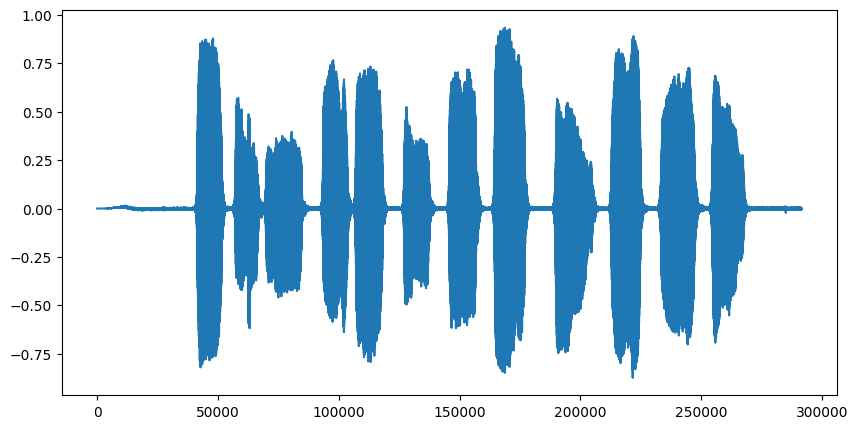

In [24]:
raw_series = pd.Series(y)
raw_series.plot(figsize=(10, 5))

In [18]:
X_test = []

In [19]:
for start, end in librosa.effects.split(y, top_db=30):
    mid = (start + end) // 2
    left = max(0, mid - sample_radius) 
    right = min(len(y), mid + sample_radius) 

    y_sample = y[left:right]
    y_sample = np.pad(y_sample, (0, max(0, shape - len(y_sample))), mode='constant')[:shape]

    mel_spec = librosa.feature.melspectrogram(y=y_sample, sr=sr, n_mels=128)
    sound_db_sample = librosa.power_to_db(mel_spec, ref=np.max)

            # Clip to range [-80, 0] and normalize to [0, 1]
    sound_db_sample = np.clip(sound_db_sample, -80, 0)
    sound_db_sample = (sound_db_sample + 80) / 80  # Normalize to range [0, 1]

            # Ensure the normalization process (Min-Max scaling)
    min_val = np.min(sound_db_sample)
    max_val = np.max(sound_db_sample)

    if min_val != max_val:  # Avoid division by zero
        sound_db_sample = (sound_db_sample - min_val) / (max_val - min_val)
    else:
        sound_db_sample = np.zeros_like(sound_db_sample)
        
    X_test.append(sound_db_sample)  # Handle case of constant array

In [22]:
print(len(X_test))

12
